<AxesSubplot:>

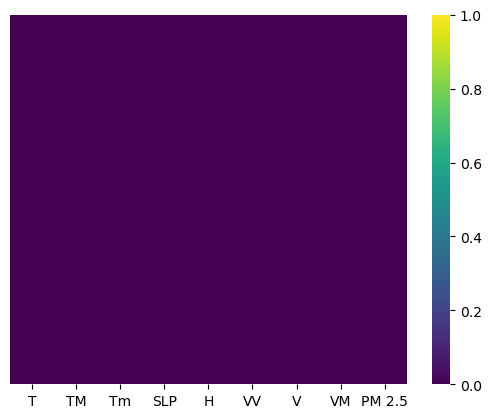

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('F:\DATA SCIENCE\Projects\AQI Delhi project\Data\Real_Data\Real_Combine.csv')
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis',cbar=True,)

<AxesSubplot:>

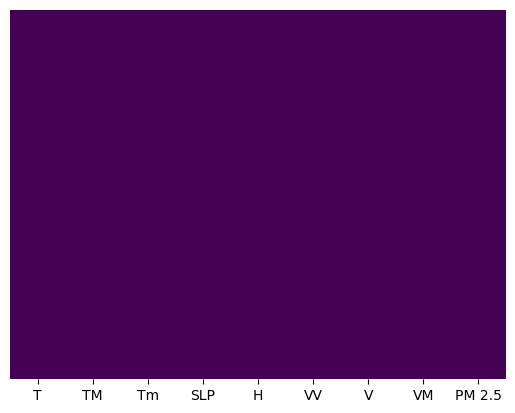

In [3]:
df.dropna(inplace=True)
df.reset_index(drop=True)
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis',cbar=False,)

In [4]:
X=df.iloc[:,:-1] # independant features
y=df.iloc[:,-1]  # independant feature

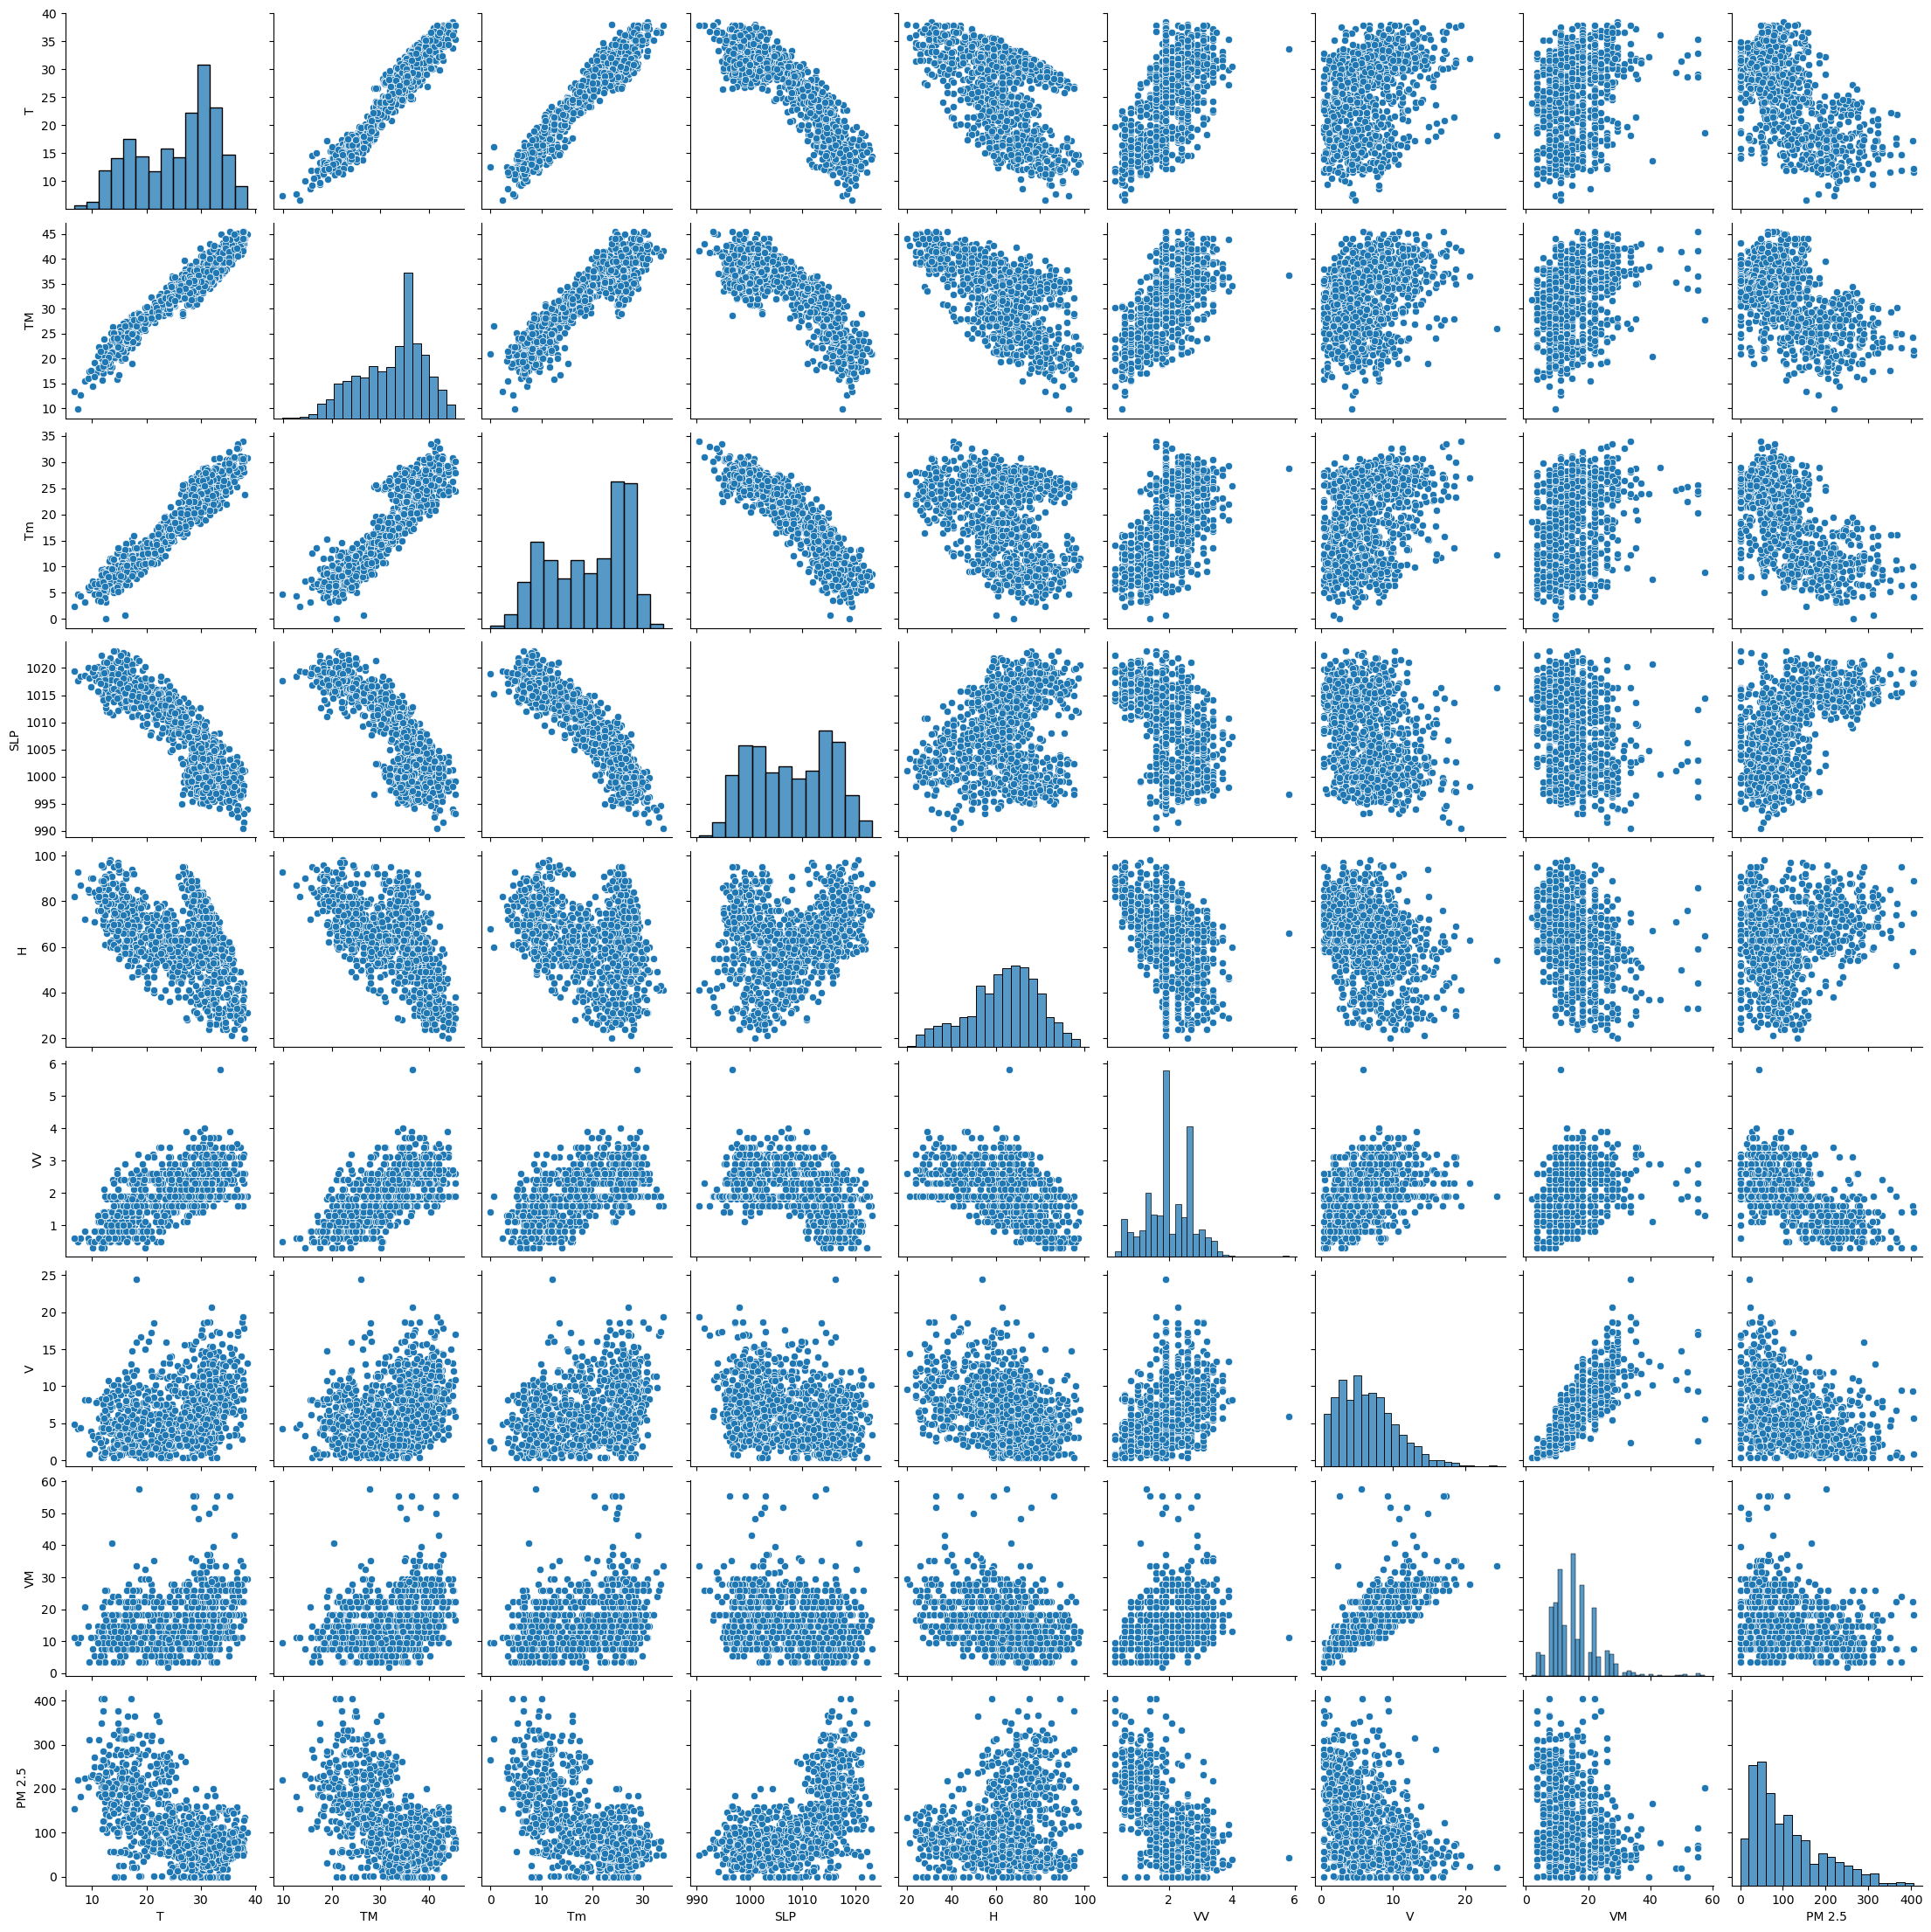

In [5]:
sns.pairplot(df)

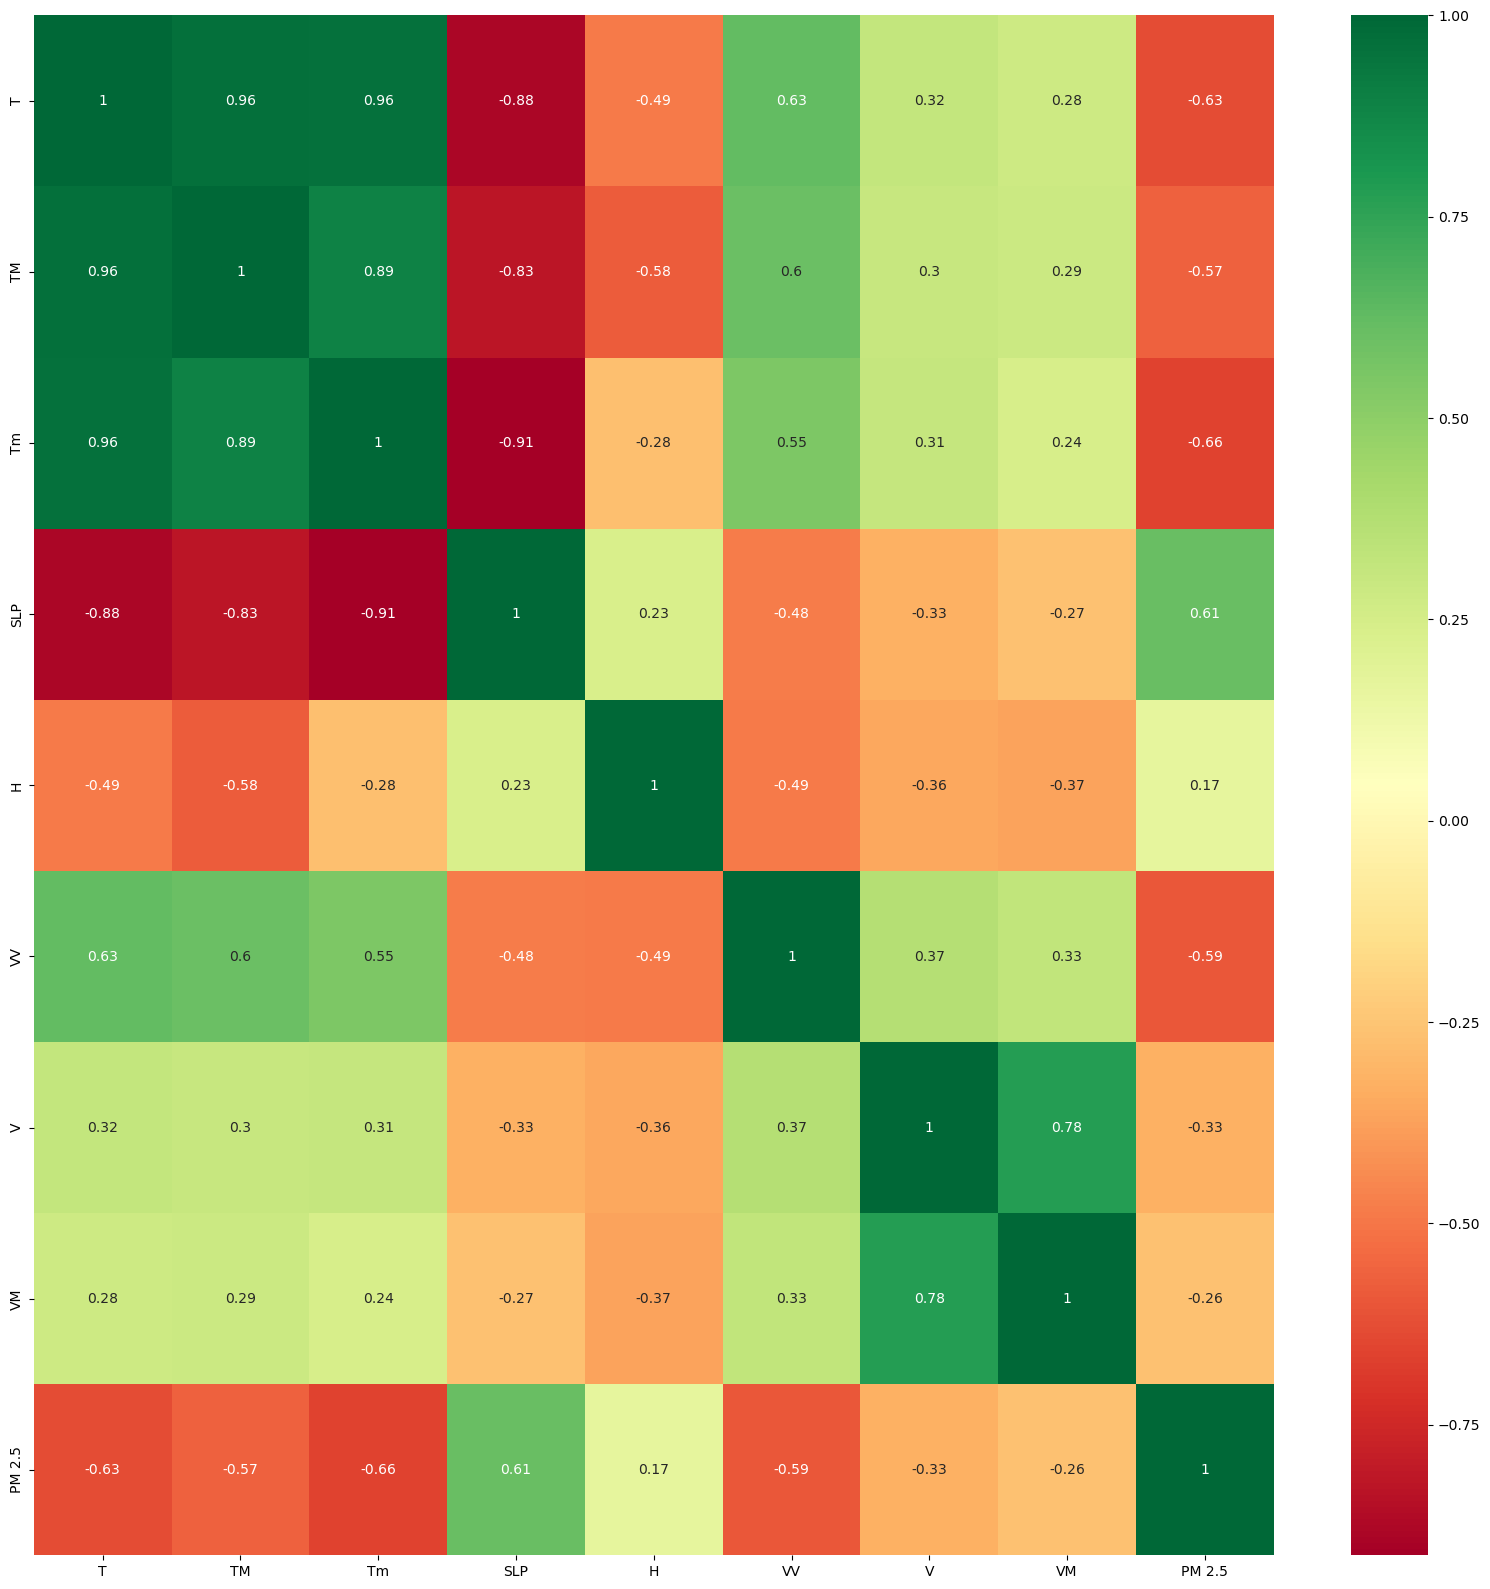

In [6]:
plt.figure(figsize=(20,20))
corr_mat=df.corr()
top_corr_features=corr_mat.index
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [7]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [8]:
print(model.feature_importances_)

[0.1727261  0.08727324 0.18478235 0.15142574 0.07897459 0.21995388
 0.05927065 0.04559345]


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

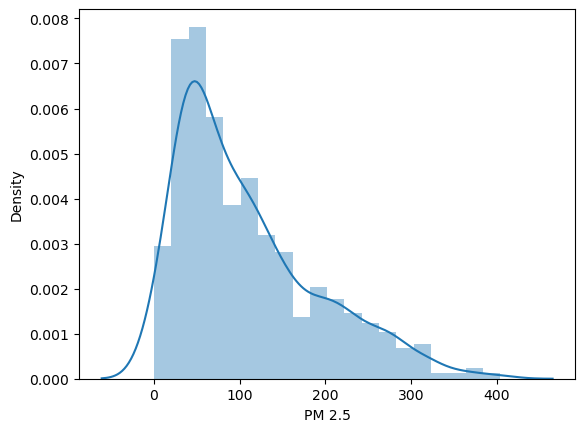

In [9]:
sns.distplot(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)

In [11]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#scaler.fit_transform(X_train)
#scaler.transform(X_test)

In [12]:
import xgboost as xgb
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [13]:
print("Coefficient of R^2 on the training data: {}".format(regressor.score(X_train,y_train)))

Coefficient of R^2 on the training data: 0.9994011063263049


In [14]:
print("Coefficient of R^2 on the test data: {}".format(regressor.score(X_test,y_test)))

Coefficient of R^2 on the test data: 0.49708612943724495


In [15]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score

array([0.48167715, 0.30097117, 0.47384831, 0.37131106, 0.27036308])

In [16]:
score.mean()

0.37963415387761124

In [17]:
prediction=regressor.predict(X_test)

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

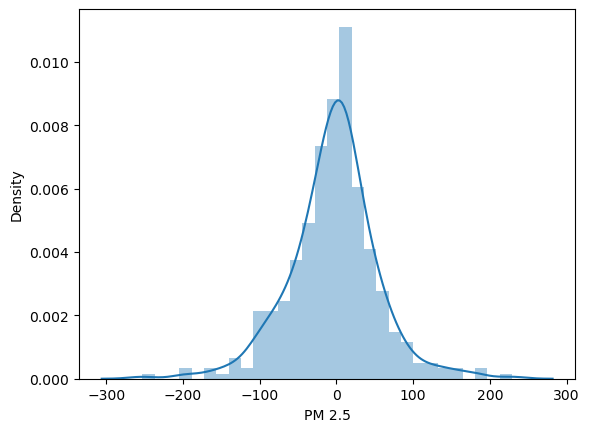

In [18]:
sns.distplot(prediction-y_test)

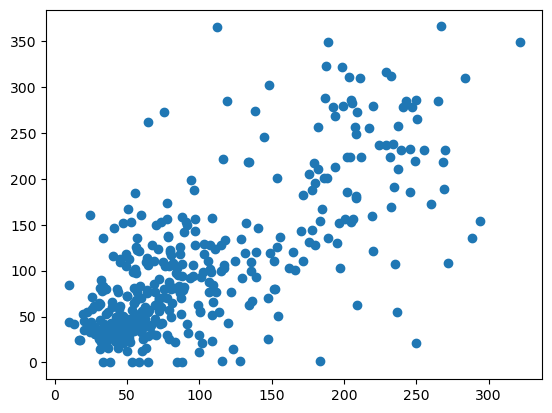

In [19]:
plt.scatter(prediction,y_test
            )

In [20]:
from sklearn.model_selection import RandomizedSearchCV  
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
learning_rate=['0.05','0.1','0.2','0.3','0.5','0.6']
max_depth=[int(x) for x in np.linspace(5,20,num=6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

In [21]:
random_grid={
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'subsample': subsample,
    'min_child_weight': min_child_weight
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 8, 11, 14, 17, 20], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [22]:
regressor=xgb.XGBRegressor()
xg_random=RandomizedSearchCV(regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5,verbose=3,random_state=42,n_jobs=1)

In [23]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=0.3, max_depth=8, min_child_weight=6, n_estimators=1100, subsample=0.7;, score=-4379.021 total time=   0.3s
[CV 2/5] END learning_rate=0.3, max_depth=8, min_child_weight=6, n_estimators=1100, subsample=0.7;, score=-3019.366 total time=   0.3s
[CV 3/5] END learning_rate=0.3, max_depth=8, min_child_weight=6, n_estimators=1100, subsample=0.7;, score=-4071.369 total time=   0.3s
[CV 4/5] END learning_rate=0.3, max_depth=8, min_child_weight=6, n_estimators=1100, subsample=0.7;, score=-3031.860 total time=   0.3s
[CV 5/5] END learning_rate=0.3, max_depth=8, min_child_weight=6, n_estimators=1100, subsample=0.7;, score=-3466.886 total time=   0.3s
[CV 1/5] END learning_rate=0.3, max_depth=14, min_child_weight=6, n_estimators=600, subsample=0.7;, score=-4411.300 total time=   0.3s
[CV 2/5] END learning_rate=0.3, max_depth=14, min_child_weight=6, n_estimators=600, subsample=0.7;, score=-3224.082 total time=

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 8, 11, 14, 17, 20],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [24]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 8,
 'learning_rate': '0.05'}

In [25]:
xg_random.best_score_

-2904.514767480119

In [26]:
pred=xg_random.predict(X_test)

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

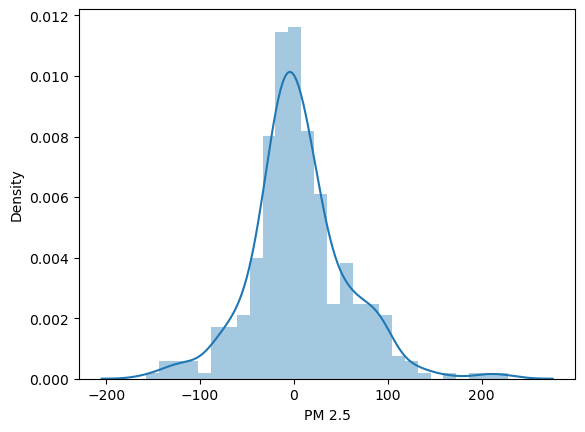

In [27]:
sns.distplot(y_test-pred)

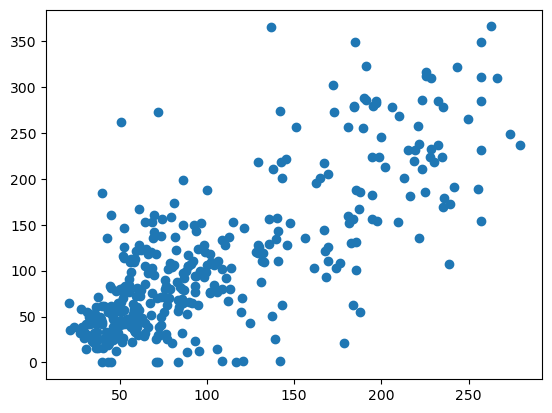

In [28]:
plt.scatter(pred,y_test)

In [29]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE: ',mean_absolute_error(y_test,pred))
print('MSE ', mean_squared_error(y_test,pred))
print('RMSE ',np.sqrt(mean_squared_error(y_test,pred)))

MAE:  37.1951592823339
MSE  2716.570420897728
RMSE  52.12072928209781


In [30]:
import pickle
file=open('XgBosst_regressor.pkl','wb')
pickle.dump(xg_random,file)